In [1]:
from Levenshtein import ratio
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
from google.cloud import storage
from matplotlib import pyplot as plt

from utils.storage import list_processed_mmd_files, download_mmd_file, download_processed_mmd_file, delete_cleaned_mmd

In [2]:
files = list_processed_mmd_files()
len(files)

73345

In [3]:
def download_mmd_files(file):
	mmd1 = download_mmd_file(file)
	mmd2 = download_processed_mmd_file(file)
	return mmd1, mmd2

In [4]:
with ThreadPoolExecutor() as executor:
	mds = list(tqdm(executor.map(download_mmd_files, files), total=len(files)))

100%|██████████| 73345/73345 [26:07<00:00, 46.78it/s]  


In [5]:
stats = []
for filename, (md1, md2) in tqdm(zip(files, mds), total=len(files)):
	stats.append(ratio(md1, md2))

100%|██████████| 73345/73345 [1:17:39<00:00, 15.74it/s]


In [6]:
stats, files, mds = zip(*sorted(zip(stats, files, mds)))

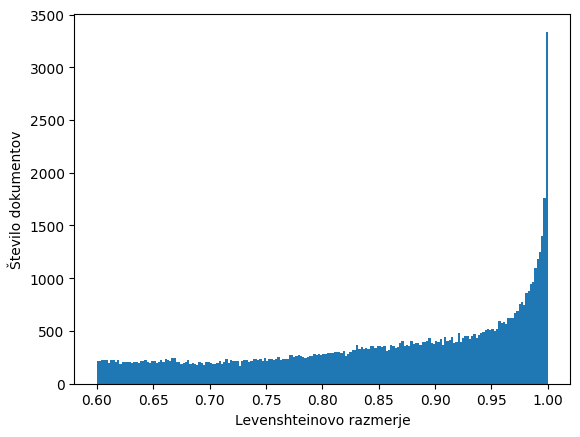

In [7]:
plt.hist(stats, bins=200)
plt.xlabel("Levenshteinovo razmerje")
plt.ylabel("Število dokumentov")
plt.show()

In [ ]:
for filename, stat in tqdm(zip(files, stats), total=len(files)):
	if stat > 0.6:
		break
	delete_cleaned_mmd(filename)